# Anomaly Detection
### Outlier Detection - Algorithms used: Isolation Forest, Local Outlier Factor, One Class SVM
### Feature Used: RMS (Root Mean Square) based values

### Import the Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load and combine the Dataset

In [7]:
# Create the blank dataframe
combined_data_rms = pd.DataFrame()

# Set the file directory
data_dir = 'D:/Springboard/Capstone_Works/Project/Proj_DataSet/2nd_test'

# rms function
def rms(x):
    y=np.sqrt((np.sum(x**2))/len(x))
    return y

# Iterate through all the files
for file_name in os.listdir(data_dir):
    df = pd.read_csv(os.path.join(data_dir, file_name), sep='\t')
            
    # To get the rms value of each file
    df_rms = np.array(df.apply(rms))
    df_rms = pd.DataFrame(df_rms.reshape(1,4))
    
    # Set the index as date_time, which is the name of the file
    df_rms.index = [file_name]
    
    # Append individual dataframes to create a single combined dataset
    combined_data_rms = combined_data_rms.append(df_rms)
    
# Insert Column headers    
combined_data_rms.columns = ['Bearing1', 'Bearing2', 'Bearing3', 'Bearing4']

In [8]:
# Printing the combined_data
print(combined_data_rms.head(5))
print(combined_data_rms.shape)

                     Bearing1  Bearing2  Bearing3  Bearing4
2004.02.12.10.32.39  0.074180  0.090945  0.109403  0.054105
2004.02.12.10.42.39  0.075382  0.093417  0.109815  0.056102
2004.02.12.10.52.39  0.076228  0.093720  0.109864  0.056146
2004.02.12.11.02.39  0.078726  0.092949  0.110662  0.056808
2004.02.12.11.12.39  0.078475  0.095350  0.107507  0.056841
(984, 4)


### Sort the dataset with data_time as index

In [9]:
# Set the data_time index and ensuring the proper format
combined_data_rms.index = pd.to_datetime(combined_data_rms.index, format='%Y.%m.%d.%H.%M.%S')

# Sort the index in chronological order
combined_data_rms = combined_data_rms.sort_index()

# Printing the combined_data
print(combined_data_rms.head(5))
print(combined_data_rms.shape)

                     Bearing1  Bearing2  Bearing3  Bearing4
2004-02-12 10:32:39  0.074180  0.090945  0.109403  0.054105
2004-02-12 10:42:39  0.075382  0.093417  0.109815  0.056102
2004-02-12 10:52:39  0.076228  0.093720  0.109864  0.056146
2004-02-12 11:02:39  0.078726  0.092949  0.110662  0.056808
2004-02-12 11:12:39  0.078475  0.095350  0.107507  0.056841
(984, 4)


## Visualizing the data

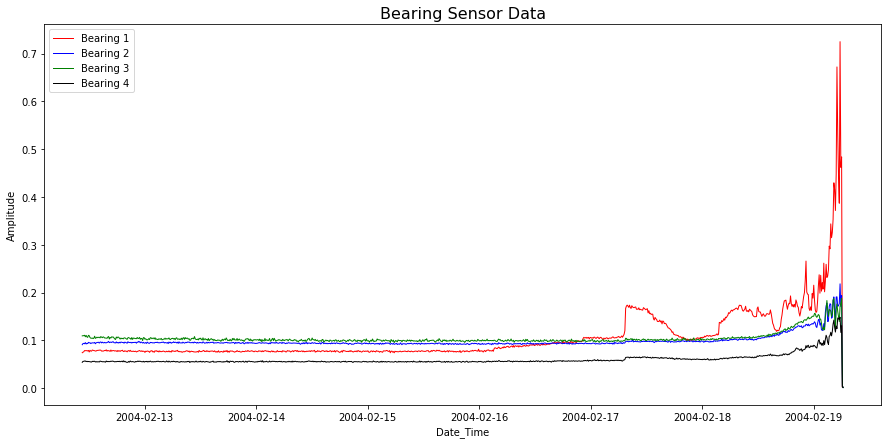

In [10]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(combined_data_rms['Bearing1'], label='Bearing 1', color='red',linewidth=1)
ax.plot(combined_data_rms['Bearing2'], label='Bearing 2', color='blue', linewidth=1)
ax.plot(combined_data_rms['Bearing3'], label='Bearing 3', color='green', linewidth=1)
ax.plot(combined_data_rms['Bearing4'], label='Bearing 4', color='black', linewidth=1)
plt.xlabel('Date_Time')
plt.ylabel("Amplitude")
plt.legend(loc='best')
ax.set_title('Bearing Sensor Data', fontsize=16)
plt.show()

### Drop last 2 rows. As the bearings failed, the machine is stopped and the vibrations becomes zero. (Near 0)

In [11]:
print(combined_data_rms.tail(5))
combined_data_rms = combined_data_rms[:-2]
combined_data_rms.shape

                     Bearing1  Bearing2  Bearing3  Bearing4
2004-02-19 05:42:39  0.725019  0.218299  0.170574  0.148355
2004-02-19 05:52:39  0.462021  0.170820  0.177875  0.116632
2004-02-19 06:02:39  0.483847  0.193646  0.187409  0.130585
2004-02-19 06:12:39  0.002103  0.004018  0.003950  0.002154
2004-02-19 06:22:39  0.001533  0.001239  0.001197  0.002124


(982, 4)

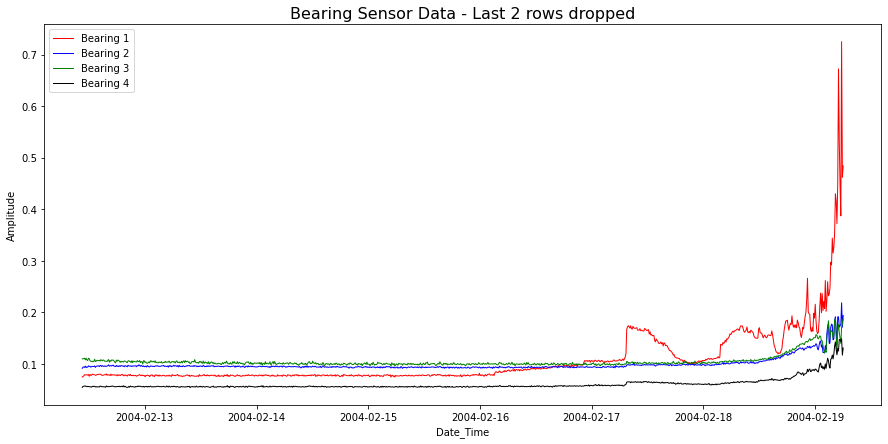

In [12]:
# Visualizing the data - last 2 rows dropped
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(combined_data_rms['Bearing1'], label='Bearing 1', color='red',linewidth=1)
ax.plot(combined_data_rms['Bearing2'], label='Bearing 2', color='blue', linewidth=1)
ax.plot(combined_data_rms['Bearing3'], label='Bearing 3', color='green', linewidth=1)
ax.plot(combined_data_rms['Bearing4'], label='Bearing 4', color='black', linewidth=1)
plt.xlabel('Date_Time')
plt.ylabel("Amplitude")
plt.legend(loc='best')
ax.set_title('Bearing Sensor Data - Last 2 rows dropped', fontsize=16)
plt.show()

### New Dataframe for EDA with time_steps (Samples) as index

In [13]:
new_comb_data = combined_data_rms.copy()

In [14]:
new_comb_data['time_steps'] = np.arange(0,len(combined_data_rms))

In [15]:
new_comb_data.index = new_comb_data['time_steps']
new_comb_data.drop(['time_steps'],axis=1,inplace=True)

In [16]:
new_comb_data.head(5)

,Bearing1,Bearing2,Bearing3,Bearing4
time_steps,,,,
0,0.074180,0.090945,0.109403,0.054105
1,0.075382,0.093417,0.109815,0.056102
2,0.076228,0.093720,0.109864,0.056146
3,0.078726,0.092949,0.110662,0.056808
4,0.078475,0.095350,0.107507,0.056841


### Visualize the dataset with samples as index

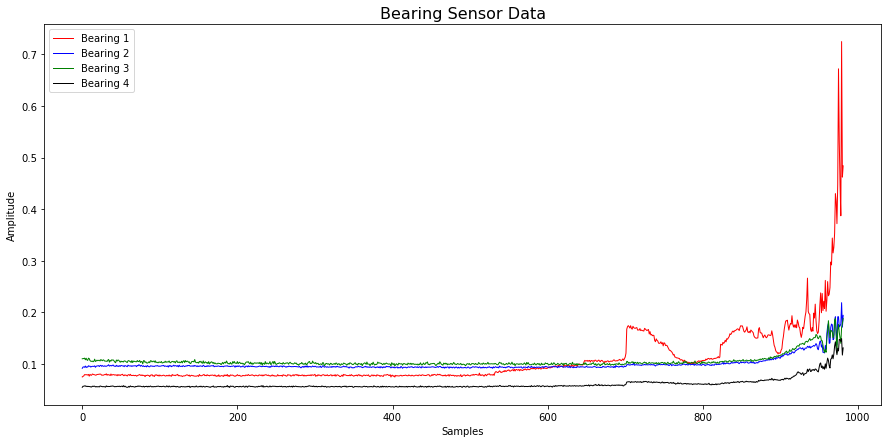

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(new_comb_data['Bearing1'], label='Bearing 1', color='red',linewidth=1)
ax.plot(new_comb_data['Bearing2'], label='Bearing 2', color='blue', linewidth=1)
ax.plot(new_comb_data['Bearing3'], label='Bearing 3', color='green', linewidth=1)
ax.plot(new_comb_data['Bearing4'], label='Bearing 4', color='black', linewidth=1)
plt.xlabel('Samples')
plt.ylabel("Amplitude")
plt.legend(loc='best')
ax.set_title('Bearing Sensor Data', fontsize=16)
plt.show()

### Univariate Anomaly Detection - Bearing 1
### Statistical Process Control Method (mean + 3sigma thresholding)

In [18]:
# Calculate Threshold for Bearing 1
# Based on dataset description, Bearing 1 is failed at the end of this dataset. 
# Hence, We are considering only the feature "Bearing 1" to calculate the threshold
# As this a run to failure test first new hundred samples are considered as normal values
bearing1_200_samples = combined_data_rms['Bearing1'][0:200]
mean_bearing1 = bearing1_200_samples.mean()
three_sigma_bearing1 = 3 * bearing1_200_samples.std()
threshold_bearing1 = mean_bearing1 + three_sigma_bearing1
print('Threshold Bearing1: ', threshold_bearing1)

Threshold Bearing1:  0.08079555138818882


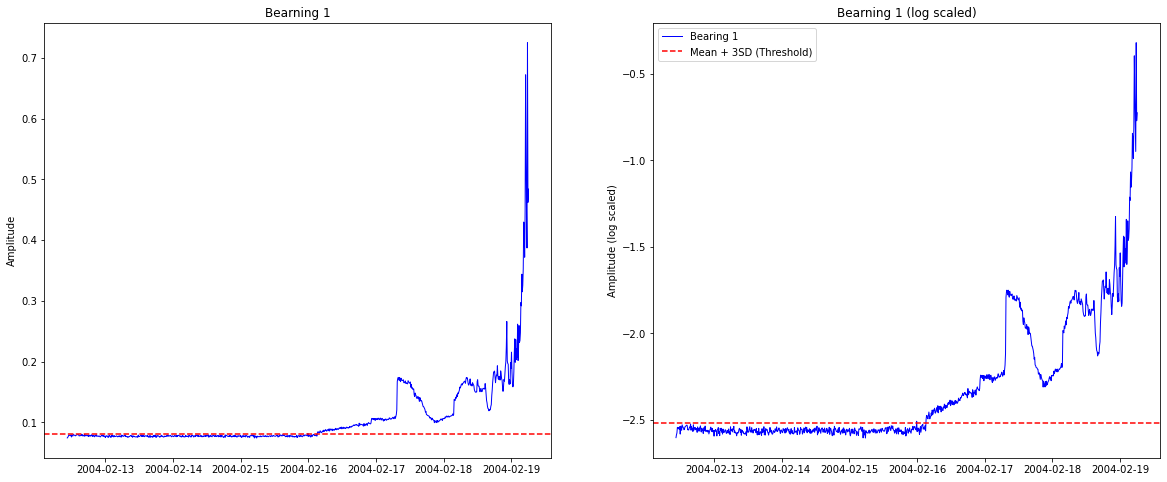

In [19]:
# Visualizing - Univariate Anomaly Detection - Bearing 1
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))
ax[0].plot(combined_data_rms['Bearing1'], label='Bearing 1', color='blue',linewidth=1)
ax[0].axhline(threshold_bearing1, color="red", linestyle="--", label='Mean + 3SD (Threshold)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Bearning 1')
ax[1].plot(np.log(combined_data_rms['Bearing1']), label='Bearing 1', color='blue',linewidth=1)
ax[1].axhline(np.log(threshold_bearing1), color="red", linestyle="--", label='Mean + 3SD (Threshold)')
ax[1].set_ylabel('Amplitude (log scaled)')
ax[1].set_title('Bearning 1 (log scaled)')
plt.legend()

### Based on visual interpretation, we see that anomaly has occured three days before the actual failure.

## Split the dataset into normal (Training Set) and abnormal data
### The model is trained only with the normal data. As this data will only be available at the starting time of the process. In realtime, we don't have access to the anomaly data at an early stage.
### Once the anomaly detection algorithm learns the normal data (training data), it can determine whether a test instance belongs to the normal class or if it is an anomaly.
## Normal data - Training data

In [20]:
# Based on Threshold calculated from bearing 1
normal_data = new_comb_data[new_comb_data['Bearing1']<threshold_bearing1]
abnormal_data = new_comb_data[new_comb_data['Bearing1']>threshold_bearing1]
print("Normal Data Shape", normal_data.shape)
print("AbNormal Data Shape",abnormal_data.shape)

Normal Data Shape (531, 4)
AbNormal Data Shape (451, 4)


### Visualizing Normal Range

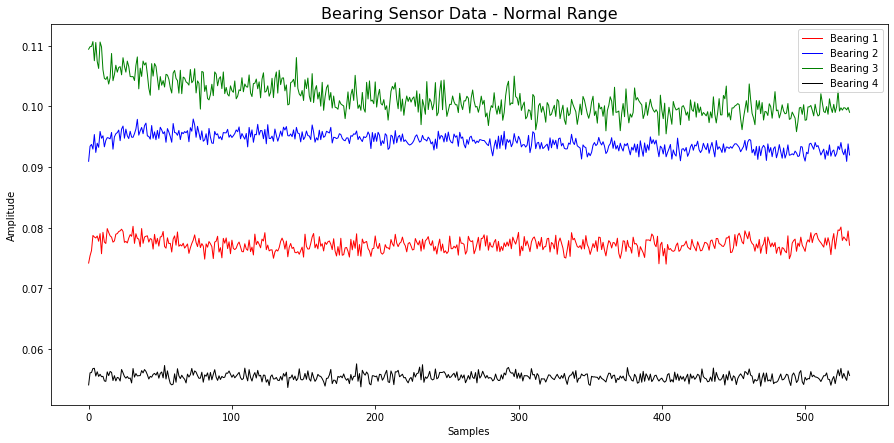

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(normal_data['Bearing1'], label='Bearing 1', color='red',linewidth=1)
ax.plot(normal_data['Bearing2'], label='Bearing 2', color='blue', linewidth=1)
ax.plot(normal_data['Bearing3'], label='Bearing 3', color='green', linewidth=1)
ax.plot(normal_data['Bearing4'], label='Bearing 4', color='black', linewidth=1)
plt.xlabel('Samples')
plt.ylabel("Amplitude")
plt.legend(loc='best')
ax.set_title('Bearing Sensor Data - Normal Range', fontsize=16)
plt.show()

### Visualizing Abnormal Range

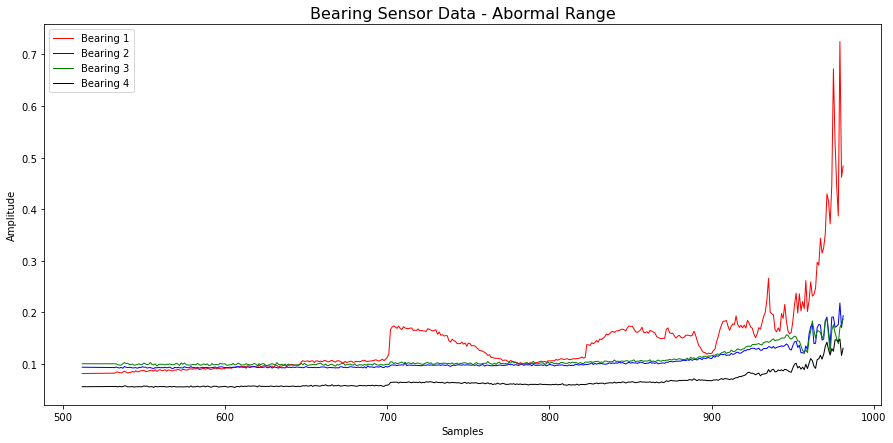

In [22]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(abnormal_data['Bearing1'], label='Bearing 1', color='red',linewidth=1)
ax.plot(abnormal_data['Bearing2'], label='Bearing 2', color='blue', linewidth=1)
ax.plot(abnormal_data['Bearing3'], label='Bearing 3', color='green', linewidth=1)
ax.plot(abnormal_data['Bearing4'], label='Bearing 4', color='black', linewidth=1)
plt.xlabel('Samples')
plt.ylabel("Amplitude")
plt.legend(loc='best')
ax.set_title('Bearing Sensor Data - Abormal Range', fontsize=16)
plt.show()

## Isolation Forest

Testing on Normal Data
Anomaly	-1	4
Normal 	1	527
Testing on Abnormal Data
Anomaly	-1	451
No Normal data
Testing on Entire Dataset
Anomaly	-1	455
Normal 	1	527


Text(0.5, 1.0, 'Bearing 1 (Entire Range)')

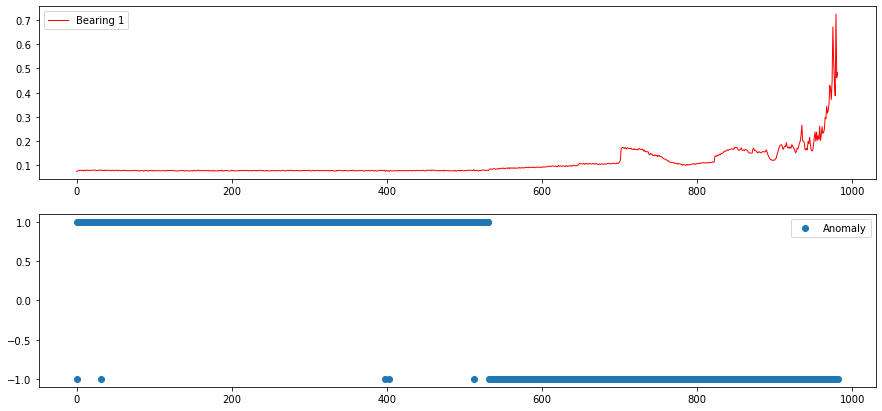

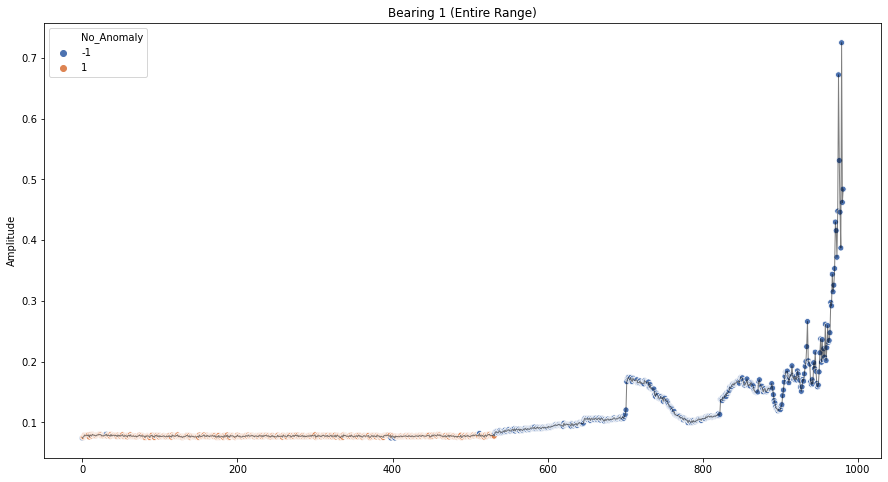

In [28]:
# Training the model with normal data
from sklearn.ensemble import IsolationForest
bearing1_ifmodel = IsolationForest(max_samples=100, random_state=0,contamination=0.007)
bearing1_ifmodel.fit(normal_data[['Bearing1']])

# Testing on normal data
y_pred_normal = bearing1_ifmodel.predict(normal_data[['Bearing1']])
unique_elements, counts_elements = np.unique(y_pred_normal, return_counts=True)
print("Testing on Normal Data")
print("Anomaly\t"+str(unique_elements[0])+"\t"+str(counts_elements[0]))
try:
    print("Normal \t"+str(unique_elements[1])+"\t"+str(counts_elements[1]))
except:
    print("No Normal data")

# Testing on Abnormal data
y_pred_abnormal = bearing1_ifmodel.predict(abnormal_data[['Bearing1']])
unique_elements, counts_elements = np.unique(y_pred_abnormal, return_counts=True)
print("Testing on Abnormal Data")
print("Anomaly\t"+str(unique_elements[0])+"\t"+str(counts_elements[0]))
try:
    print("Normal \t"+str(unique_elements[1])+"\t"+str(counts_elements[1]))
except:
    print("No Normal data")

# Testing on full dataset (entire range)
nor_abnor1 = new_comb_data.iloc[:,0].values
y_pred_nor_abnor = bearing1_ifmodel.predict(nor_abnor1.reshape(-1,1))
unique_elements, counts_elements = np.unique(y_pred_nor_abnor, return_counts=True)
print("Testing on Entire Dataset")
print("Anomaly\t"+str(unique_elements[0])+"\t"+str(counts_elements[0]))
try:
    print("Normal \t"+str(unique_elements[1])+"\t"+str(counts_elements[1]))
except:
    print("No Normal data")
# Visualizing the results
fig, ax = plt.subplots(nrows=2,figsize=(15,7))
ax[0].plot(nor_abnor1, label='Bearing 1', color='red',linewidth=1)
ax[1].scatter(range(0,len(y_pred_nor_abnor)),y_pred_nor_abnor, label='Anomaly')
ax[0].legend()
ax[1].legend()
# Visualizing the results - DataFrame
viz_df=pd.DataFrame({'Bearing1':nor_abnor1,'No_Anomaly':y_pred_nor_abnor})
plt.figure(figsize=(15,8))
sns.scatterplot(x=range(0,len(viz_df)),y=viz_df.Bearing1,hue=viz_df.No_Anomaly,palette="deep")
plt.plot(nor_abnor1, color='black',linewidth=1,alpha=0.5)
plt.ylabel('Amplitude')
plt.title('Bearing 1 (Entire Range)')

## Local Outlier Factor

Anomaly	-1	451
Normal 	1	531


Text(0.5, 1.0, 'Bearing 1 (Entire Range)')

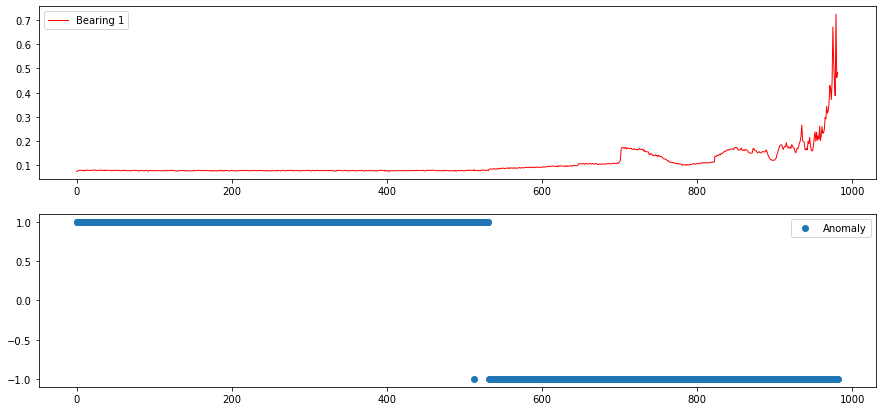

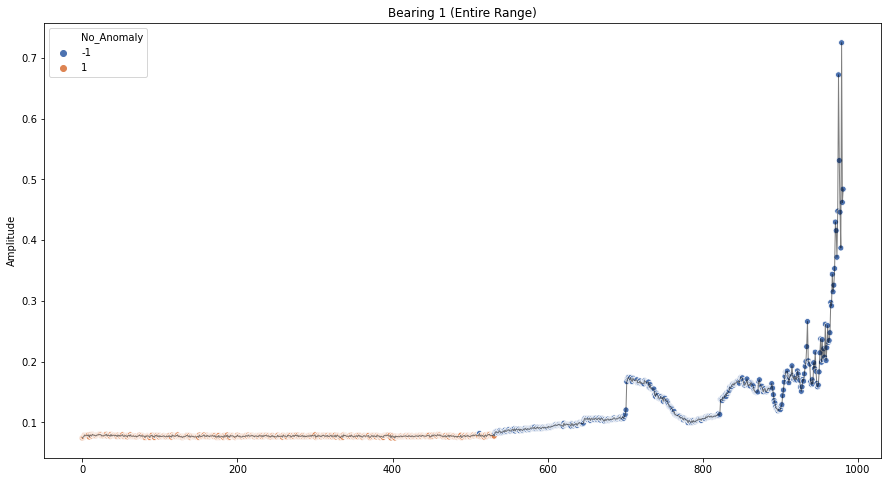

In [34]:
# Training using Normal data
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.002,novelty=True)
clf.fit(normal_data[['Bearing1']])

# Testing using entire full range data
y_pred = clf.predict(nor_abnor1.reshape(-1,1))
unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
print("Anomaly\t"+str(unique_elements[0])+"\t"+str(counts_elements[0]))
try:
    print("Normal \t"+str(unique_elements[1])+"\t"+str(counts_elements[1]))
except:
    print("No Normal data")
# Visualizing the results
fig, ax = plt.subplots(nrows=2,figsize=(15,7))
ax[0].plot(nor_abnor1, label='Bearing 1', color='red',linewidth=1)
ax[1].scatter(range(0,len(y_pred)),y_pred, label='Anomaly')
ax[0].legend()
ax[1].legend()
# Visualizing the results - DataFrame
viz_df=pd.DataFrame({'Bearing1':nor_abnor1,'No_Anomaly':y_pred})
plt.figure(figsize=(15,8))
sns.scatterplot(x=range(0,len(viz_df)),y=viz_df.Bearing1,hue=viz_df.No_Anomaly,palette="deep")
plt.plot(nor_abnor1, color='black',linewidth=1,alpha=0.5)
plt.ylabel('Amplitude')
plt.title('Bearing 1 (Entire Range)')